In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_55571_I')

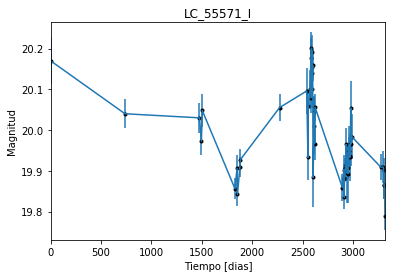

In [2]:
data = np.genfromtxt('LC_55571_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_55571_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

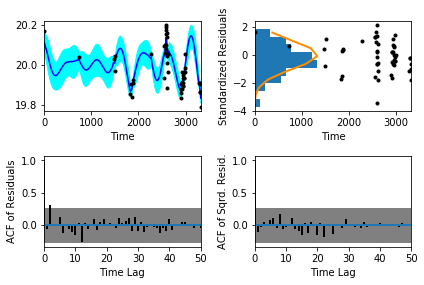

In [5]:
sample.assess_fit()

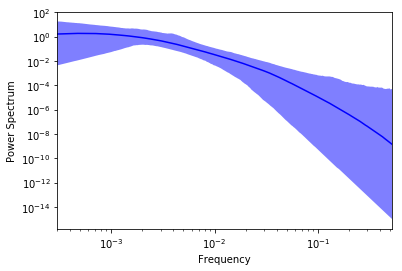

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_55571_I')

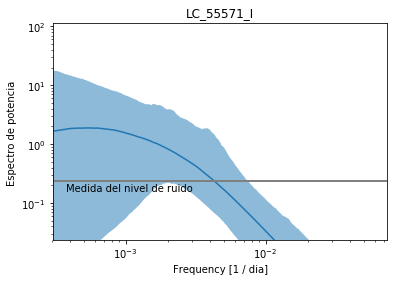

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_55571_I')

Text(0.5,1,'Prediccion , valor esperado LC_55571_I')

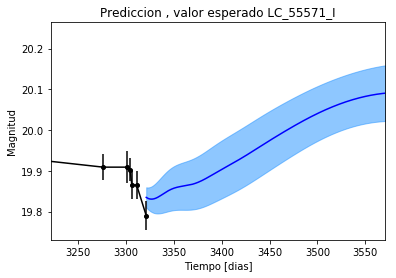

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_55571_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_55571_I')

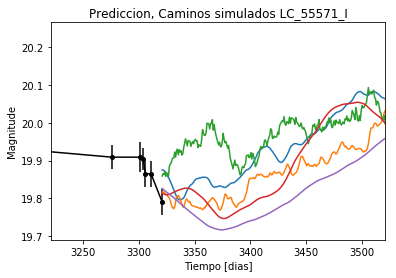

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_55571_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_55571_I')

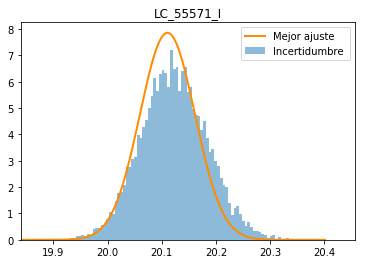

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_55571_I')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_I')

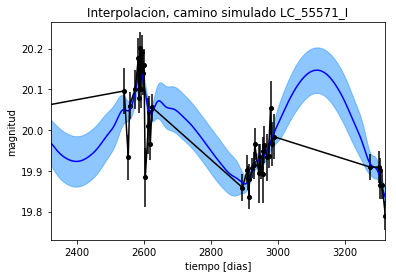

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_I')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_I')

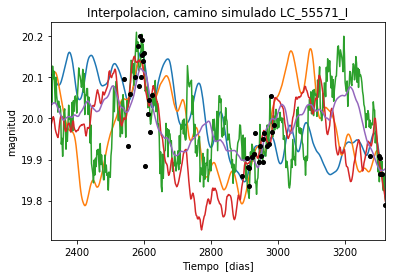

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 576.353479039
Median: 0.0174503223037
Standard deviation: 0.200300549214
68% credibility interval: [ 0.00154725  0.20263389]
95% credibility interval: [  3.93470058e-04   8.04147151e-01]
99% credibility interval: [  3.13277294e-04   9.75560621e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 635.757476152
Median: 0.00436406482875
Standard deviation: 0.104176423332
68% credibility interval: [ 0.00068442  0.0529441 ]
95% credibility interval: [ 0.00033991  0.33470738]
99% credibility interval: [  3.07925782e-04   7.66675711e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 672.211443233
Median: 0.036371928521
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2017.3176899
Median: 93.0814581203
Standard deviation: 1.65242090797
68% credibility interval: [ 91.2582824   94.33026103]
95% credibility interval: [ 88.68532276  94.99792984]
99% credibility interval: [ 86.67473702  95.2609939 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 364.60215183
Median: 0.967876399668
Standard deviation: 2.24398121956
68% credibility interval: [ 0.13150831  4.15518998]
95% credibility interval: [ 0.0243395   7.56511048]
99% credibility interval: [  0.01377364  11.34697147]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 553.639351002
Median: 0.69547297396
Standard deviation: 10.0901920199
68% credibility interval: [  0.0338981   10.41260965]
95% credibility interval: [  3.96924013e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1692.11927602
Median: 2.18282609819e-06
Standard deviation: 5.1139467478e+121
68% credibility interval: [  3.92434553e-45   3.03953574e+39]
95% credibility interval: [  5.84225288e-100   7.59544359e+108]
99% credibility interval: [  5.72638806e-118   3.76959932e+118]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2493.27067645
Median: 19.9860260562
Standard deviation: 0.0454125344919
68% credibility interval: [ 19.95030958  20.02645765]
95% credibility interval: [ 19.90719821  20.09274968]
99% credibility interval: [ 19.86100795  20.14924445]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 328.393284978
Median: 0.0166435269907
Standard deviation: 0.26205563405
68% credibility interval: [ 0.          0.41875186]
95% credibility interval: [ 0.          0.92343263]
99% credibility interval: [ 0.         1.0182143]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 328.393284978
Median: 0.0166435269907
Standard deviation: 0.26205563405
68% credibility interval: [ 0.          0.41875186]
95% credibility interval: [ 0.          0.92343263]
99% credibility interval: [ 0.         1.0182143]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 472.369168342
Median: 0.0
Standard deviation: 0.00104085550338
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2017.3176899
Median: 93.0814581203
Standard deviation: 1.65242090797
68% credibility interval: [ 91.2582824   94.33026103]
95% credibility interval: [ 88.68532276  94.99792984]
99% credibility interval: [ 86.67473702  95.2609939 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 717.647598922
Median: 0.0113781742751
Standard deviation: 0.0104221010283
68% credibility interval: [ 0.00676633  0.02086475]
95% credibility interval: [ 0.0043429  0.0414157]
99% credibility interval: [ 0.00340263  0.06229444]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2094.16237863
Median: 1.11131138065
Standard deviation: 0.188731737349
68% credibility interval: [ 0.93959818  1.31190793]
95% credibility interval: [ 0.80985414  1.54840294]
99% credibility interval: [ 0.73682248  1.68655063]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 594.014232248
Median: 5.22103500543e-05
Standard deviation: 0.146278056844
68% credibility interval: [  8.02978335e-42   1.74979599e-02]
95% credibility interval: [  1.14886972e-111   2.71095687e-001]
99% credibility interval: [  2.32889543e-122   9.91485990e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 576.353479039
Median: (-0.109643608704-0.189491060363j)
Standard deviation: 2.07243669573
68% credibility interval: [-1.27318630-1.90211344j -0.00972166-0.18002109j]
95% credibility interval: [ -5.05260556e+00+0.j          -2.47224529e-03-0.09025374j]
99% credibility interval: [ -6.12962816e+00+0.j         -1.96837929e-03-0.0220855j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 635.757476152
Median: (-0.0274202280116+4.82796625758j)
Standard deviation: 1.77187922847
68% credibility interval: [-0.33265761+0.58336752j -0.00430034+0.j        ]
95% credibility interval: [-2.10302851+2.31685434j -0.00213569+0.j        ]
99% credibility interval: [ -4.81716556e+00+1.76555509j  -1.93475475e-03+0.01071138j]
Posterior summar